In [90]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [91]:
df = pd.read_csv('/Users/gaetanoantonicchio/Desktop/UNIVERSITY OF PISA - DATA SCIENCE/Data Mining - 1/DATAMINING_PROJECT/assocrule_df.csv')

In [92]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,31,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,12,3,0,2,3,3,2,2,2,1
1,20,No,Travel_Frequently,1240,Research & Development,2,4,Life Sciences,4,Female,...,13,4,1,1,3,3,1,0,0,0
2,37,No,Travel_Rarely,916,Research & Development,17,2,Life Sciences,4,Male,...,13,3,0,10,2,3,3,2,0,2
3,39,No,Travel_Rarely,1354,Research & Development,5,3,Medical,3,Male,...,12,4,0,14,3,3,10,10,5,8
4,35,No,Travel_Rarely,1333,Research & Development,1,3,Technical Degree,4,Male,...,13,2,1,15,3,3,13,12,5,11


In [93]:
df.dtypes

Age                           int64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                     object
PercentSalaryHike             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany                int64
YearsInCurrentRole          

In [94]:
categories = ['Attrition','BusinessTravel','Education','EducationField','WorkLifeBalance','Gender','JobRole','MaritalStatus','Department']
not_cat = ['MonthlyIncome','Age','TotalWorkingYears']

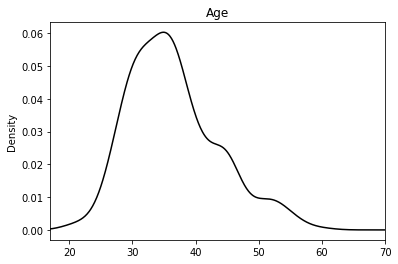

In [95]:
x = plt.xlim((17, 70))
plt.title('Age')
df["Age"].plot.kde(x = 'x', color = 'black')

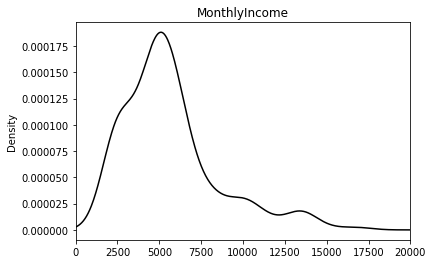

In [96]:
x = plt.xlim((0, 20000))
plt.title('MonthlyIncome')
df["MonthlyIncome"].plot.kde(x = 'x', color = 'black')

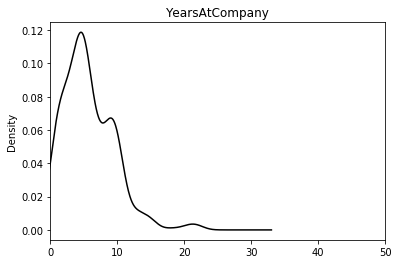

In [97]:
x = plt.xlim((0, 50))
plt.title('YearsAtCompany')
df["YearsAtCompany"].plot.kde(x = 'x', color = 'black')

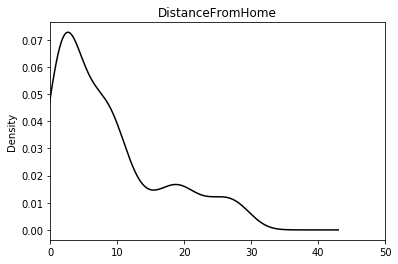

In [98]:
x = plt.xlim((0, 50))
plt.title('DistanceFromHome')
df["DistanceFromHome"].plot.kde(x = 'x', color = 'black')

In [99]:
df['DistanceFromHome'].value_counts()

1     62
2     60
3     26
8     26
5     25
10    24
9     22
4     22
7     21
6     12
11    11
19    10
24    10
28     9
18     9
20     8
13     7
21     7
17     6
14     5
27     5
26     5
29     4
16     4
15     4
25     3
12     2
22     2
23     1
Name: DistanceFromHome, dtype: int64

In [100]:
df['YearsAtCompany'].describe()

count    412.000000
mean       5.708738
std        3.818590
min        0.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       22.000000
Name: YearsAtCompany, dtype: float64

In [101]:
df = df[['Attrition','BusinessTravel','DistanceFromHome','Education','EducationField','Gender','JobRole','MaritalStatus','Department','MonthlyIncome','Age','WorkLifeBalance','YearsAtCompany']]

In [102]:
df.head()

,Attrition,BusinessTravel,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,Department,MonthlyIncome,Age,WorkLifeBalance,YearsAtCompany
0,No,Travel_Rarely,9,2,Life Sciences,Female,Laboratory Technician,Single,Research & Development,7978.000000,31,3,2
1,No,Travel_Frequently,2,4,Life Sciences,Female,Laboratory Technician,Divorced,Research & Development,2323.000000,20,3,1
2,No,Travel_Rarely,17,2,Life Sciences,Male,Research Scientist,Single,Research & Development,3375.000000,37,3,3
3,No,Travel_Rarely,5,3,Medical,Male,Manager,Single,Research & Development,3069.000000,39,3,10
4,No,Travel_Rarely,1,3,Technical Degree,Male,Research Director,Married,Research & Development,8264.307692,35,3,13


In [103]:
df['DistanceFromHome'] = pd.cut(df['DistanceFromHome'], [0, 10, 20, 30], right=False)

In [104]:
df['Age'] = pd.cut(df['Age'], [18, 30, 40, 50, 60], right=False)

In [105]:
df['MonthlyIncome'] = pd.cut(df['MonthlyIncome'], [0, 2500, 5000, 7500, 10000, 12500, 17500 ], right=False)

In [106]:
df['YearsAtCompany'] = pd.cut(df['YearsAtCompany'], [0, 5, 10, 15, 30], right=False)

In [107]:
df['Education'].value_counts()

3    149
4    112
2     94
1     45
5     12
Name: Education, dtype: int64

In [108]:
df['WorkLifeBalance'].value_counts()

3    250
2     94
4     40
1     28
Name: WorkLifeBalance, dtype: int64

In [109]:
dict = {1:'below college', 2:'college', 3:'bachelor', 4:'master', 5:'PhD'}
dict_1 = {1:'low', 2:'medium', 3:'high', 4:'very high'}

df = df.replace({"Education": dict}) 
df = df.replace({"WorkLifeBalance": dict_1}) 



In [110]:
df.head()

,Attrition,BusinessTravel,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,Department,MonthlyIncome,Age,WorkLifeBalance,YearsAtCompany
0,No,Travel_Rarely,"[0, 10)",college,Life Sciences,Female,Laboratory Technician,Single,Research & Development,"[7500, 10000)","[30, 40)",high,"[0, 5)"
1,No,Travel_Frequently,"[0, 10)",master,Life Sciences,Female,Laboratory Technician,Divorced,Research & Development,"[0, 2500)","[18, 30)",high,"[0, 5)"
2,No,Travel_Rarely,"[10, 20)",college,Life Sciences,Male,Research Scientist,Single,Research & Development,"[2500, 5000)","[30, 40)",high,"[0, 5)"
3,No,Travel_Rarely,"[0, 10)",bachelor,Medical,Male,Manager,Single,Research & Development,"[2500, 5000)","[30, 40)",high,"[10, 15)"
4,No,Travel_Rarely,"[0, 10)",bachelor,Technical Degree,Male,Research Director,Married,Research & Development,"[7500, 10000)","[30, 40)",high,"[10, 15)"


In [111]:
df['Age'] = 'Age:' + df['Age'].astype(str)
df['MonthlyIncome'] = 'MonthlyIncome:' + df['MonthlyIncome'].astype(str)
df['YearsAtCompany'] = 'YAC:' + df['YearsAtCompany'].astype(str)
df['Attrition'] = 'Attrition:' + df['Attrition'].astype(str)
df['WorkLifeBalance'] = 'WLB:' + df['WorkLifeBalance']
df['DistanceFromHome'] = 'DFH:' + df['DistanceFromHome'].astype(str)





In [112]:
df.head()

,Attrition,BusinessTravel,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,Department,MonthlyIncome,Age,WorkLifeBalance,YearsAtCompany
0,Attrition:No,Travel_Rarely,"DFH:[0, 10)",college,Life Sciences,Female,Laboratory Technician,Single,Research & Development,"MonthlyIncome:[7500, 10000)","Age:[30.0, 40.0)",WLB:high,"YAC:[0, 5)"
1,Attrition:No,Travel_Frequently,"DFH:[0, 10)",master,Life Sciences,Female,Laboratory Technician,Divorced,Research & Development,"MonthlyIncome:[0, 2500)","Age:[18.0, 30.0)",WLB:high,"YAC:[0, 5)"
2,Attrition:No,Travel_Rarely,"DFH:[10, 20)",college,Life Sciences,Male,Research Scientist,Single,Research & Development,"MonthlyIncome:[2500, 5000)","Age:[30.0, 40.0)",WLB:high,"YAC:[0, 5)"
3,Attrition:No,Travel_Rarely,"DFH:[0, 10)",bachelor,Medical,Male,Manager,Single,Research & Development,"MonthlyIncome:[2500, 5000)","Age:[30.0, 40.0)",WLB:high,"YAC:[10, 15)"
4,Attrition:No,Travel_Rarely,"DFH:[0, 10)",bachelor,Technical Degree,Male,Research Director,Married,Research & Development,"MonthlyIncome:[7500, 10000)","Age:[30.0, 40.0)",WLB:high,"YAC:[10, 15)"


In [113]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Series([], dtype: int64)

In [114]:
from fim import apriori

In [115]:
help(apriori)


Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

In [116]:
#in questo modo creiamo i baskets, cioé selezioniamo gli attributi per ogni riga corrispondente
baskets = df.values.tolist()


# frequent itemset

In [117]:
height = []
for i in range (1, 28):
    itemsets = apriori(baskets, supp=i, zmin=3, target='a')
    print('Number of itemsets:{} supp: {}'.format(len(itemsets),i))
    height.append(len(itemsets))
    

    

Number of itemsets:77553 supp: 1
Number of itemsets:25899 supp: 2
Number of itemsets:12686 supp: 3
Number of itemsets:7329 supp: 4
Number of itemsets:4637 supp: 5
Number of itemsets:3128 supp: 6
Number of itemsets:2233 supp: 7
Number of itemsets:1612 supp: 8
Number of itemsets:1136 supp: 9
Number of itemsets:880 supp: 10
Number of itemsets:684 supp: 11
Number of itemsets:527 supp: 12
Number of itemsets:423 supp: 13
Number of itemsets:358 supp: 14
Number of itemsets:284 supp: 15
Number of itemsets:233 supp: 16
Number of itemsets:169 supp: 17
Number of itemsets:143 supp: 18
Number of itemsets:119 supp: 19
Number of itemsets:95 supp: 20
Number of itemsets:83 supp: 21
Number of itemsets:64 supp: 22
Number of itemsets:53 supp: 23
Number of itemsets:48 supp: 24
Number of itemsets:42 supp: 25
Number of itemsets:33 supp: 26
Number of itemsets:29 supp: 27


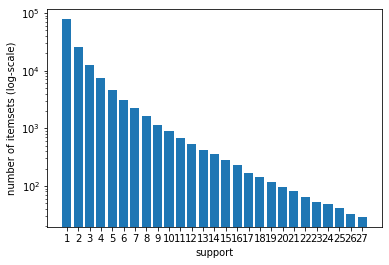

In [118]:



bars = ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.yscale('log')
plt.xlabel('support')
plt.ylabel('number of itemsets (log-scale)')
 
# Show graphic
plt.show()

In [119]:
itemsets = apriori(baskets, supp=15,  zmin=3, target='a')
print('support 15%'.format())
itemsets.sort(key=lambda x: x[1],reverse=True)
itemsets[0:16]


    

support 15%


[(('Research & Development', 'Travel_Rarely', 'Attrition:No'), 171),
 (('DFH:[0, 10)', 'Travel_Rarely', 'Attrition:No'), 165),
 (('WLB:high', 'Travel_Rarely', 'Attrition:No'), 161),
 (('Research & Development', 'DFH:[0, 10)', 'Attrition:No'), 161),
 (('Male', 'Travel_Rarely', 'Attrition:No'), 155),
 (('WLB:high', 'DFH:[0, 10)', 'Attrition:No'), 148),
 (('WLB:high', 'Research & Development', 'Attrition:No'), 147),
 (('Male', 'Research & Development', 'Attrition:No'), 146),
 (('Male', 'DFH:[0, 10)', 'Attrition:No'), 143),
 (('Research & Development', 'DFH:[0, 10)', 'Travel_Rarely'), 140),
 (('WLB:high', 'DFH:[0, 10)', 'Travel_Rarely'), 137),
 (('Age:[30.0, 40.0)', 'Travel_Rarely', 'Attrition:No'), 135),
 (('WLB:high', 'Male', 'Attrition:No'), 135),
 (('WLB:high', 'Research & Development', 'Travel_Rarely'), 129),
 (('Age:[30.0, 40.0)', 'DFH:[0, 10)', 'Attrition:No'), 126),
 (('Male', 'DFH:[0, 10)', 'Travel_Rarely'), 126)]

In [120]:
itemsets = apriori(baskets, supp=19,  zmin=3, target='a')
print('support 16%'.format())
itemsets.sort(key=lambda x: x[1],reverse=True)
itemsets[0:10]

support 16%


[(('Research & Development', 'Travel_Rarely', 'Attrition:No'), 171),
 (('DFH:[0, 10)', 'Travel_Rarely', 'Attrition:No'), 165),
 (('WLB:high', 'Travel_Rarely', 'Attrition:No'), 161),
 (('Research & Development', 'DFH:[0, 10)', 'Attrition:No'), 161),
 (('Male', 'Travel_Rarely', 'Attrition:No'), 155),
 (('WLB:high', 'DFH:[0, 10)', 'Attrition:No'), 148),
 (('WLB:high', 'Research & Development', 'Attrition:No'), 147),
 (('Male', 'Research & Development', 'Attrition:No'), 146),
 (('Male', 'DFH:[0, 10)', 'Attrition:No'), 143),
 (('Research & Development', 'DFH:[0, 10)', 'Travel_Rarely'), 140)]

Travel_rarely appears in itemsets that contain Attritoin:no

In [121]:
itemsets = apriori(baskets, supp=2,  zmin=3, target='a')
print('support 16%'.format())
itemsets.sort(key=lambda x: x[1],reverse=True)
itemsets[0:20]

support 16%


[(('Research & Development', 'Travel_Rarely', 'Attrition:No'), 171),
 (('DFH:[0, 10)', 'Travel_Rarely', 'Attrition:No'), 165),
 (('WLB:high', 'Travel_Rarely', 'Attrition:No'), 161),
 (('Research & Development', 'DFH:[0, 10)', 'Attrition:No'), 161),
 (('Male', 'Travel_Rarely', 'Attrition:No'), 155),
 (('WLB:high', 'DFH:[0, 10)', 'Attrition:No'), 148),
 (('WLB:high', 'Research & Development', 'Attrition:No'), 147),
 (('Male', 'Research & Development', 'Attrition:No'), 146),
 (('Male', 'DFH:[0, 10)', 'Attrition:No'), 143),
 (('Research & Development', 'DFH:[0, 10)', 'Travel_Rarely'), 140),
 (('WLB:high', 'DFH:[0, 10)', 'Travel_Rarely'), 137),
 (('Age:[30.0, 40.0)', 'Travel_Rarely', 'Attrition:No'), 135),
 (('WLB:high', 'Male', 'Attrition:No'), 135),
 (('WLB:high', 'Research & Development', 'Travel_Rarely'), 129),
 (('Age:[30.0, 40.0)', 'DFH:[0, 10)', 'Attrition:No'), 126),
 (('Male', 'DFH:[0, 10)', 'Travel_Rarely'), 126),
 (('Age:[30.0, 40.0)', 'Research & Development', 'Attrition:No'), 1

In [122]:
results = []
for support in range(1, 25):
    for confidence in range(1, 80):
        itemsets = apriori(baskets, supp=support, zmin=2,zmax=3, target='r', conf=confidence, report='SCl')
        for e in itemsets: 
            results.append({
                'supp': e[2],
                'conf': e[3],
                'lift': e[4]
            })
    print(support)
            
results[0:5]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


[{'supp': 0.24271844660194172, 'conf': 12.5, 'lift': 51.5},
 {'supp': 0.24271844660194172,
  'conf': 11.11111111111111,
  'lift': 45.77777777777778},
 {'supp': 0.24271844660194172,
  'conf': 7.142857142857142,
  'lift': 29.428571428571427},
 {'supp': 0.24271844660194172,
  'conf': 5.88235294117647,
  'lift': 24.235294117647058},
 {'supp': 0.24271844660194172,
  'conf': 6.666666666666667,
  'lift': 27.466666666666665}]

In [123]:
df_ = pd.DataFrame(results)


In [124]:
df_.head()


,supp,conf,lift
0,0.242718,12.500000,51.500000
1,0.242718,11.111111,45.777778
2,0.242718,7.142857,29.428571
3,0.242718,5.882353,24.235294
4,0.242718,6.666667,27.466667


In [125]:
df_ = df_[df_['lift'] <= 6]


In [126]:
df_s = df_.sample(10000)


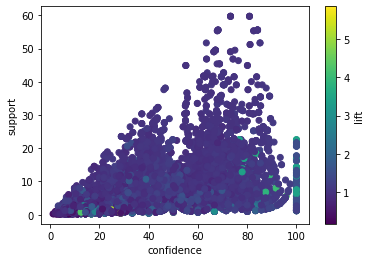

In [127]:
plt.scatter(df_s['conf'], df_s['supp'],c= df_s['lift'], cmap='viridis')
plt.xlabel("confidence")
plt.ylabel("support")
plt.colorbar(label="lift")
plt.show()


In [128]:
df_.lift.max()


5.971014492753623

MAXIMAL ITEMSETS

In [129]:
itemsets = apriori(baskets, supp=20 ,conf=100, zmin=1, zmax=2, target='r')
itemsets

[('Research & Development', ('Research Scientist',), 85),
 ('Research & Development', ('Laboratory Technician',), 89),
 ('Sales', ('Sales Executive',), 93)]

In [130]:
print('Number of itemsets:', len(itemsets))

itemsets

Number of itemsets: 3


[('Research & Development', ('Research Scientist',), 85),
 ('Research & Development', ('Laboratory Technician',), 89),
 ('Sales', ('Sales Executive',), 93)]

In [131]:
itemsets.sort(key=lambda x: x[1],reverse=True)


In [132]:
itemsets[:16]


[('Sales', ('Sales Executive',), 93),
 ('Research & Development', ('Research Scientist',), 85),
 ('Research & Development', ('Laboratory Technician',), 89)]

CLOSED ITEMSETS

In [133]:
itemsets = apriori(baskets, supp=20, zmin=3, target='c')


In [134]:
print('Number of itemsets:', len(itemsets))


Number of itemsets: 95


In [135]:
for i in range(4, 35):
    itemsets = apriori(baskets, supp=i, zmin=3, target='c')
    print('Number of itemsets:{} supp: {}'.format(len(itemsets),i))
    

Number of itemsets:6479 supp: 4
Number of itemsets:4228 supp: 5
Number of itemsets:2915 supp: 6
Number of itemsets:2115 supp: 7
Number of itemsets:1545 supp: 8
Number of itemsets:1099 supp: 9
Number of itemsets:859 supp: 10
Number of itemsets:673 supp: 11
Number of itemsets:524 supp: 12
Number of itemsets:421 supp: 13
Number of itemsets:356 supp: 14
Number of itemsets:284 supp: 15
Number of itemsets:233 supp: 16
Number of itemsets:169 supp: 17
Number of itemsets:143 supp: 18
Number of itemsets:119 supp: 19
Number of itemsets:95 supp: 20
Number of itemsets:83 supp: 21
Number of itemsets:64 supp: 22
Number of itemsets:53 supp: 23
Number of itemsets:48 supp: 24
Number of itemsets:42 supp: 25
Number of itemsets:33 supp: 26
Number of itemsets:29 supp: 27
Number of itemsets:25 supp: 28
Number of itemsets:19 supp: 29
Number of itemsets:18 supp: 30
Number of itemsets:14 supp: 31
Number of itemsets:13 supp: 32
Number of itemsets:11 supp: 33
Number of itemsets:9 supp: 34


In [136]:
#make barplot for this

In [137]:
itemsets.sort(key=lambda x: x[1],reverse=True)


In [138]:
itemsets


[(('Research & Development', 'Travel_Rarely', 'Attrition:No'), 171),
 (('DFH:[0, 10)', 'Travel_Rarely', 'Attrition:No'), 165),
 (('WLB:high', 'Travel_Rarely', 'Attrition:No'), 161),
 (('Research & Development', 'DFH:[0, 10)', 'Attrition:No'), 161),
 (('Male', 'Travel_Rarely', 'Attrition:No'), 155),
 (('WLB:high', 'DFH:[0, 10)', 'Attrition:No'), 148),
 (('WLB:high', 'Research & Development', 'Attrition:No'), 147),
 (('Male', 'Research & Development', 'Attrition:No'), 146),
 (('Male', 'DFH:[0, 10)', 'Attrition:No'), 143)]

ASSOCIATION RULES

In [139]:
rules = apriori(baskets, supp=19, zmin=3, target='r', conf=80, 
                report='ascl')
rules.sort(key=lambda x: x[4],reverse=True)

rules

[('Attrition:No',
  ('YAC:[5, 10)', 'Research & Development', 'Travel_Rarely'),
  78,
  0.18932038834951456,
  0.9285714285714286,
  1.1386054421768708),
 ('Attrition:No',
  ('Married', 'Male', 'Travel_Rarely'),
  72,
  0.17475728155339806,
  0.9113924050632911,
  1.1175406871609403),
 ('Attrition:No',
  ('WLB:high', 'Male', 'Research & Development'),
  92,
  0.22330097087378642,
  0.9108910891089109,
  1.1169259783121168),
 ('Attrition:No',
  ('YAC:[5, 10)', 'WLB:high'),
  90,
  0.21844660194174756,
  0.9090909090909091,
  1.1147186147186148),
 ('Attrition:No',
  ('YAC:[5, 10)', 'Research & Development'),
  105,
  0.25485436893203883,
  0.9051724137931034,
  1.1099137931034482),
 ('Attrition:No',
  ('YAC:[5, 10)', 'Travel_Rarely'),
  114,
  0.2766990291262136,
  0.9047619047619048,
  1.1094104308390023),
 ('Attrition:No',
  ('YAC:[5, 10)', 'Research & Development', 'DFH:[0, 10)'),
  73,
  0.17718446601941748,
  0.9012345679012346,
  1.1050852439741328),
 ('Attrition:No',
  ('Married',

In [140]:
print('Number of rule:', len(rules), '\n')
rules[0:10]

Number of rule: 101 



[('Attrition:No',
  ('YAC:[5, 10)', 'Research & Development', 'Travel_Rarely'),
  78,
  0.18932038834951456,
  0.9285714285714286,
  1.1386054421768708),
 ('Attrition:No',
  ('Married', 'Male', 'Travel_Rarely'),
  72,
  0.17475728155339806,
  0.9113924050632911,
  1.1175406871609403),
 ('Attrition:No',
  ('WLB:high', 'Male', 'Research & Development'),
  92,
  0.22330097087378642,
  0.9108910891089109,
  1.1169259783121168),
 ('Attrition:No',
  ('YAC:[5, 10)', 'WLB:high'),
  90,
  0.21844660194174756,
  0.9090909090909091,
  1.1147186147186148),
 ('Attrition:No',
  ('YAC:[5, 10)', 'Research & Development'),
  105,
  0.25485436893203883,
  0.9051724137931034,
  1.1099137931034482),
 ('Attrition:No',
  ('YAC:[5, 10)', 'Travel_Rarely'),
  114,
  0.2766990291262136,
  0.9047619047619048,
  1.1094104308390023),
 ('Attrition:No',
  ('YAC:[5, 10)', 'Research & Development', 'DFH:[0, 10)'),
  73,
  0.17718446601941748,
  0.9012345679012346,
  1.1050852439741328),
 ('Attrition:No',
  ('Married',

In [141]:
rules.sort(key=lambda x: x[4],reverse=True)


In [142]:
count = 0
for r in rules:
    if r[5] > 0.67 and r[5]:
        print(r)
        count += 1
        if count == 10:
            break
            
# i primi formano l'association rule
# il terzo elemento è il support dell'itemset
# il quarto elemento è il support relativo espresso come frazione
# il quinto è la confidence della rule
# il sesto è il lift value.

('Attrition:No', ('YAC:[5, 10)', 'Research & Development', 'Travel_Rarely'), 78, 0.18932038834951456, 0.9285714285714286, 1.1386054421768708)
('Attrition:No', ('Married', 'Male', 'Travel_Rarely'), 72, 0.17475728155339806, 0.9113924050632911, 1.1175406871609403)
('Attrition:No', ('WLB:high', 'Male', 'Research & Development'), 92, 0.22330097087378642, 0.9108910891089109, 1.1169259783121168)
('Attrition:No', ('YAC:[5, 10)', 'WLB:high'), 90, 0.21844660194174756, 0.9090909090909091, 1.1147186147186148)
('Attrition:No', ('YAC:[5, 10)', 'Research & Development'), 105, 0.25485436893203883, 0.9051724137931034, 1.1099137931034482)
('Attrition:No', ('YAC:[5, 10)', 'Travel_Rarely'), 114, 0.2766990291262136, 0.9047619047619048, 1.1094104308390023)
('Attrition:No', ('YAC:[5, 10)', 'Research & Development', 'DFH:[0, 10)'), 73, 0.17718446601941748, 0.9012345679012346, 1.1050852439741328)
('Attrition:No', ('Married', 'Travel_Rarely'), 119, 0.28883495145631066, 0.8947368421052632, 1.0971177944862156)
('

In [143]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

In [144]:
rules = apriori(baskets, supp=2, zmin=2, zmax=3, target='r', conf=60, 
                report='ascl') 

In [145]:
for r in rules:
    if r[0] == 'Attrition:Yes':
        print(r)

('Attrition:Yes', ('Sales Representative', 'MonthlyIncome:[5000, 7500)'), 7, 0.01699029126213592, 0.6363636363636364, 3.449760765550239)
('Attrition:Yes', ('Sales Representative', 'Single'), 11, 0.02669902912621359, 0.7333333333333333, 3.975438596491228)
('Attrition:Yes', ('Sales Representative', 'bachelor'), 6, 0.014563106796116505, 0.6666666666666666, 3.6140350877192984)
('Attrition:Yes', ('Sales Representative', 'YAC:[0, 5)'), 12, 0.02912621359223301, 0.631578947368421, 3.4238227146814406)
('Attrition:Yes', ('Sales Representative', 'Age:[30.0, 40.0)'), 10, 0.024271844660194174, 0.6666666666666666, 3.6140350877192984)
('Attrition:Yes', ('Sales Representative', 'Travel_Rarely'), 11, 0.02669902912621359, 0.8461538461538461, 4.587044534412955)
('Attrition:Yes', ('WLB:low', 'Laboratory Technician'), 9, 0.021844660194174758, 0.75, 4.065789473684211)
('Attrition:Yes', ('WLB:low', 'MonthlyIncome:[5000, 7500)'), 8, 0.019417475728155338, 0.7272727272727273, 3.9425837320574164)
('Attrition:Yes

In [146]:
for r in rules:
    if r[0] == '':
        print(r)


sales rep, monthl 5000-7500, ---> yes
wlb low, lab tech ---> yes
wlb low, monthl incom 5000-7500 --> yes



PREDICTION WITH RULES

In [147]:
df['predicted'] = 'Not_predicted'

In [148]:
df

,Attrition,BusinessTravel,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,Department,MonthlyIncome,Age,WorkLifeBalance,YearsAtCompany,predicted
0,Attrition:No,Travel_Rarely,"DFH:[0, 10)",college,Life Sciences,Female,Laboratory Technician,Single,Research & Development,"MonthlyIncome:[7500, 10000)","Age:[30.0, 40.0)",WLB:high,"YAC:[0, 5)",Not_predicted
1,Attrition:No,Travel_Frequently,"DFH:[0, 10)",master,Life Sciences,Female,Laboratory Technician,Divorced,Research & Development,"MonthlyIncome:[0, 2500)","Age:[18.0, 30.0)",WLB:high,"YAC:[0, 5)",Not_predicted
2,Attrition:No,Travel_Rarely,"DFH:[10, 20)",college,Life Sciences,Male,Research Scientist,Single,Research & Development,"MonthlyIncome:[2500, 5000)","Age:[30.0, 40.0)",WLB:high,"YAC:[0, 5)",Not_predicted
3,Attrition:No,Travel_Rarely,"DFH:[0, 10)",bachelor,Medical,Male,Manager,Single,Research & Development,"MonthlyIncome:[2500, 5000)","Age:[30.0, 40.0)",WLB:high,"YAC:[10, 15)",Not_predicted
4,Attrition:No,Travel_Rarely,"DFH:[0, 10)",bachelor,Technical Degree,Male,Research Director,Married,Research & Development,"MonthlyIncome:[7500, 10000)","Age:[30.0, 40.0)",WLB:high,"YAC:[10, 15)",Not_predicted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,Attrition:No,Travel_Frequently,"DFH:[10, 20)",bachelor,Life Sciences,Male,Manufacturing Director,Married,Research & Development,"MonthlyIncome:[0, 2500)","Age:[40.0, 50.0)",WLB:medium,"YAC:[5, 10)",Not_predicted
408,Attrition:Yes,Travel_Rarely,"DFH:[0, 10)",below college,Marketing,Female,Sales Representative,Single,Sales,"MonthlyIncome:[5000, 7500)","Age:[30.0, 40.0)",WLB:high,"YAC:[0, 5)",Not_predicted
409,Attrition:Yes,Non-Travel,"DFH:[0, 10)",master,Life Sciences,Female,Sales Executive,Married,Sales,"MonthlyIncome:[5000, 7500)","Age:[30.0, 40.0)",WLB:medium,"YAC:[10, 15)",Not_predicted
410,Attrition:No,Travel_Rarely,"DFH:[0, 10)",below college,Marketing,Male,Sales Executive,Married,Sales,"MonthlyIncome:[2500, 5000)","Age:[30.0, 40.0)",WLB:very high,"YAC:[0, 5)",Not_predicted


In [76]:
df['predicted'] = np.where((np.logical_and(df['Department'] == 'Sales' ,df['MonthlyIncome'] == 'MonthlyIncome:[5000, 7500)')),str('Attrition:Yes'),df['predicted'] )

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [77]:
#df['predicted'] = np.where((np.logical_and(df['JobRole'] == 'Sales Representative' ,df['YearsAtCompany'] == 'YAC:[0,5)')),str('Attrition:Yes'),df['predicted'] )

In [78]:
df['predicted'] = np.where((np.logical_and(df['WorkLifeBalance'] == 'WLB:low' ,df['JobRole'] == 'Laboratory Technician')),str('Attrition:Yes'),df['predicted'] )

In [79]:
df['predicted'] = np.where((np.logical_and(df['WorkLifeBalance'] == 'WLB:low' ,df['MonthlyIncome'] == 'MonthlyIncome:[5000, 7500)')),str('Attrition:Yes'),df['predicted'] )

In [80]:
df['predicted'] = np.where(df['predicted']=='Not_predicted',str('Attrition:No'),df['predicted'])


In [81]:
df['predicted'].value_counts()

Attrition:No    114
Name: predicted, dtype: int64

In [82]:
df_ = df[df['predicted'] == 'Attrition:No']
TN = len(df_[df_['Attrition'] != 'Attrition:Yes'])
TN            #TN

93

In [83]:
FN = len(df_[df_['Attrition'] == 'Attrition:Yes'])
FN            #FN

21

In [84]:
df2 = df[df['predicted'] == 'Attrition:Yes']
TP = len(df2[df2['Attrition'] != 'Attrition:No'])
TP            #TP

0

In [85]:
FP =  len(df2[df2['Attrition'] == 'Attrition:No'])
FP            #FP

0

In [86]:
accuracy = (TP + TN) / (TP + TN + FN + FP)
accuracy

0.8157894736842105

In [87]:
precision = TP / (TP + FP)
precision

ZeroDivisionError: division by zero

In [88]:
recall = TP / (TP + FN)
recall

0.0

In [89]:
f_score = (2*TP)/(2*TP + FN + FP)    
f_score

0.0

In [ ]:
df_n = pd.read_csv('/Users/gaetanoantonicchio/Desktop/UNIVERSITY OF PISA - DATA SCIENCE/Data Mining - 1/DATAMINING_PROJECT/df_assmiss.csv')

In [ ]:
df_n.isnull().any()

In [151]:
#replacing missing values

In [149]:
df_missing = pd.read_csv('/Users/gaetanoantonicchio/Desktop/UNIVERSITY OF PISA - DATA SCIENCE/Data Mining - 1/DATAMINING_PROJECT/df_assmiss.csv')

In [150]:
df_missing.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,3,80.0,0,2,NaN,3,2.0,2,2,1
1,20.0,No,Travel_Frequently,1240,Research & Development,2,4,Life Sciences,4,Female,...,4,80.0,1,1,3.0,3,1.0,0,0,0
2,NaN,No,Travel_Rarely,916,Research & Development,17,2,Life Sciences,4,Male,...,3,80.0,0,10,2.0,3,3.0,2,0,2
3,39.0,No,NaN,1354,Research & Development,5,3,Medical,3,Male,...,4,80.0,0,14,3.0,3,10.0,10,5,8
4,35.0,No,Travel_Rarely,1333,Research & Development,1,3,Technical Degree,4,Male,...,2,80.0,1,15,3.0,3,13.0,12,5,11


In [151]:
df_missing.isnull().any()

Age                          True
Attrition                   False
BusinessTravel               True
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                       True
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome                True
MonthlyRate                 False
NumCompaniesWorked          False
Over18                       True
OverTime                    False
PercentSalaryHike           False
PerformanceRating            True
RelationshipSatisfaction    False
StandardHours                True
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear        True
WorkLifeBalance             False
YearsAtCompany

In [152]:
#replace Nan values of Gender

In [153]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

In [182]:
itemsets = apriori(baskets, supp=1, conf= 60,zmax=3, target='r', report='SCl')
itemsets.sort(key=lambda x: x[4],reverse=True)

for r in itemsets:
    if r[0] == 'Female':
        print(r)


('Female', ('below college', 'YAC:[5, 10)'), 2.669902912621359, 84.61538461538461, 2.2935222672064777)
('Female', ('Human Resources', 'Travel_Frequently'), 1.2135922330097086, 83.33333333333334, 2.258771929824561)
('Female', ('MonthlyIncome:[12500, 17500)', 'Age:[50.0, 60.0)'), 1.2135922330097086, 83.33333333333334, 2.258771929824561)
('Female', ('below college', 'DFH:[20, 30)'), 1.2135922330097086, 83.33333333333334, 2.258771929824561)
('Female', ('MonthlyIncome:[12500, 17500)', 'Research Scientist'), 0.9708737864077669, 80.0, 2.168421052631579)
('Female', ('MonthlyIncome:[12500, 17500)', 'bachelor'), 0.9708737864077669, 80.0, 2.168421052631579)
('Female', ('MonthlyIncome:[7500, 10000)', 'below college'), 0.9708737864077669, 80.0, 2.168421052631579)
('Female', ('Technical Degree', 'Laboratory Technician'), 0.9708737864077669, 80.0, 2.168421052631579)
('Female', ('DFH:[20, 30)', 'Research Scientist'), 1.9417475728155338, 80.0, 2.168421052631579)
('Female', ('below college', 'WLB:medium

In [164]:
df_missing['Gender_r'] = df_missing['Gender']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


female --> below college, wlb: medium
female --> below college, maritalstatus: single
female --> human resources, travel_frequently

('Male', ('Divorced', 'Sales'), 3.8834951456310676, 76.19047619047619, 1.2073260073260073)
('Male', ('Attrition:Yes', 'Divorced'), 2.4271844660194173, 90.9090909090909, 1.4405594405594406)
('Male', ('Non-Travel', 'master'), 2.4271844660194173, 90.9090909090909, 1.4405594405594406)



In [ ]:
#female

In [165]:
df_missing['Gender_r'] = np.where((np.logical_and(df_missing['Education'] == 1 ,df_missing['WorkLifeBalance'] == 2)),str('Female'), df_missing['Gender_r'])

In [166]:
df_missing['Gender_r'] = np.where((np.logical_and(df_missing['Education'] == 1 ,df_missing['MaritalStatus'] == 'Single')),str('Female'), df_missing['Gender_r'])

In [167]:
df_missing['Gender_r'] = np.where((np.logical_and(df_missing['Department'] == 'Human Resources' ,df_missing['BusinessTravel'] == 'Travel_Frequently')),str('Female'), df_missing['Gender_r'])

In [ ]:
#Male 

In [171]:
df_missing['Gender_r'] = np.where((np.logical_and(df_missing['JobRole'] == 'Research Director' ,df_missing['MaritalStatus'] == 'Single')),str('Male'), df_missing['Gender_r'])

In [172]:
df_missing['Gender_r'] = np.where((np.logical_and(df_missing['MaritalStatus'] == 'Divorced' ,df_missing['Attrition'] == 'Yes')),str('Male'), df_missing['Gender_r'])

In [176]:
df_missing['Gender_r'] = np.where((np.logical_and(df_missing['BusinessTravel'] == 'Non_Travel' ,df_missing['Education'] == 4)),str('Male'), df_missing['Gender_r'])

In [177]:
df_missing['Gender'].isnull().sum()

24

In [178]:
df_missing['Gender_r'].isnull().sum()

21

In [179]:
df_missing['Gender_r'] = np.where((np.logical_and(df_missing['Education'] == 1 ,df_missing['WorkLifeBalance'] == 2)),str('Female'), df_missing['Gender_r'])

In [180]:
df_missing['Gender_r'].isnull().sum()

21